<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/0102522024_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import Library**

###**1.1 Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

###**1.2 Load Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
demographic_data = pd.read_csv("/content/drive/MyDrive/DM/uas/demographic.csv", encoding="latin1")
diet_data = pd.read_csv("/content/drive/MyDrive/DM/uas/diet.csv", encoding="latin1")
examination_data = pd.read_csv("/content/drive/MyDrive/DM/uas/examination.csv", encoding="latin1")
labs_data = pd.read_csv("/content/drive/MyDrive/DM/uas/labs.csv", encoding="latin1")
medications_data = pd.read_csv("/content/drive/MyDrive/DM/uas/medications.csv", encoding="latin1")
questionnaire_data = pd.read_csv("/content/drive/MyDrive/DM/uas/questionnaire.csv", encoding="latin1")

###**1.3 5 Data Pertama dari dataset**

In [5]:
# 1.3 Inspeksi Awal Dataset (5 baris pertama)

demographic_data.head(5)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [6]:
diet_data.head(5)

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [7]:
examination_data.head(5)

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [8]:
labs_data.head(5)

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [9]:
medications_data.head(5)

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [10]:
questionnaire_data.head(5)

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


###**1.4 Merge Dataset**

In [11]:
# 1.3. Gabungkan dataset yang diperlukan
analysis_data = diet_data.merge(demographic_data, on='SEQN', how='inner')
analysis_data = analysis_data.merge(examination_data, on='SEQN', how='inner')

#**2. Data Preprocessing**

###**2.1. Feature Selection**

In [12]:
features_abbr = [
    'SEQN',
    'DR1TCARB', # Total Karbohidrat
    'DR1TSUGR', # Total Gula
    'BMXBMI'    # Indeks Massa Tubuh (untuk analisis)
]


###**2.2. Feature Mapping**

In [13]:
feature_name_mapping = {
    'SEQN': 'ID_Responden',
    'DR1TCARB': 'Total_Karbohidrat_(gram)',
    'DR1TSUGR': 'Total_Gula_(gram)',
    'BMXBMI': 'Indeks_Massa_Tubuh'
}

analysis_df = analysis_data[features_abbr].copy()
analysis_df.rename(columns=feature_name_mapping, inplace=True)
analysis_df.dropna(inplace=True)

print("Fitur gizi telah diseleksi, diubah namanya, dan dibersihkan.")
print(f"Jumlah data setelah pembersihan: {len(analysis_df)}")

Fitur gizi telah diseleksi, diubah namanya, dan dibersihkan.
Jumlah data setelah pembersihan: 7989


#**3. EDA**

###**3.1. Pilih fitur yang akan digunakan untuk membentuk cluster**

In [14]:
features_for_clustering = [
    'Total_Karbohidrat_(gram)',
    'Total_Gula_(gram)'
]

X = analysis_df[features_for_clustering]

###**3.2. Lakukan penskalaan fitur menggunakan StandardScaler**

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering, index=X.index)

print("Data telah siap dan diskalakan untuk klastering.")

Data telah siap dan diskalakan untuk klastering.


#**4. Menentukan Jumlah Cluster Optimal**

###**4.1. Hitung inersia untuk berbagai jumlah cluster (k)**

In [16]:
# 4.1. Hitung inersia untuk berbagai jumlah cluster (k)
inertia_values = []
k_range = range(2, 11) # Mencoba dari 2 sampai 10 cluster

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_df)
    inertia_values.append(kmeans.inertia_)

###**4.2. Plot grafik Metode Siku**

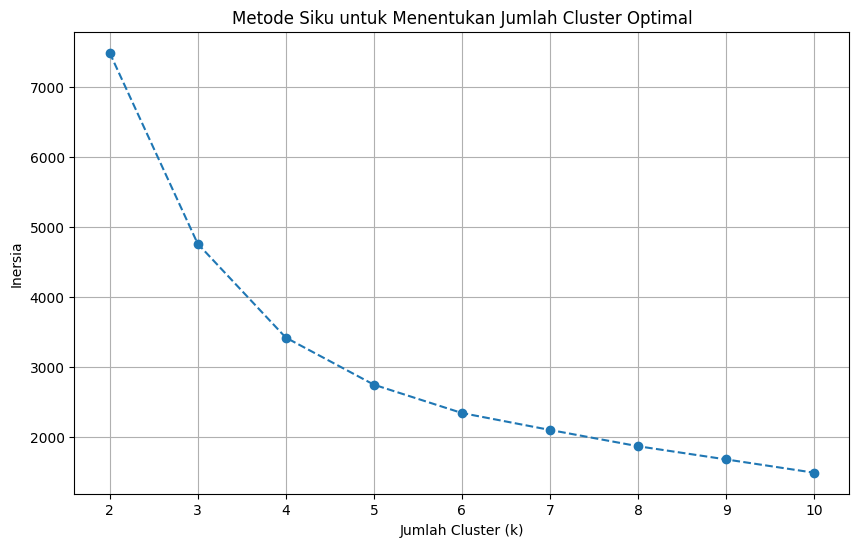

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inersia')
plt.title('Metode Siku untuk Menentukan Jumlah Cluster Optimal')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#**5. Modelling**

In [18]:
# 5.1. Pilih jumlah cluster optimal berdasarkan grafik siku (misalnya 3)
optimal_k = 3
print(f"Jumlah cluster yang dipilih: {optimal_k}\n")

Jumlah cluster yang dipilih: 3



In [19]:
# 5.2. Latih model K-Means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [20]:
# 5.3. Tambahkan label cluster ke DataFrame asli
analysis_df['Pola_Diet_Cluster'] = kmeans.labels_

print("Model K-Means telah dilatih dan label cluster telah ditambahkan.")

Model K-Means telah dilatih dan label cluster telah ditambahkan.


#**6. Hasil**

In [21]:
# 6.1. Dapatkan pusat cluster (centroid) dan kembalikan ke skala asli
scaled_centroids = kmeans.cluster_centers_
original_centroids = scaler.inverse_transform(scaled_centroids)

# Buat DataFrame untuk menampilkan profil setiap cluster
centroid_df = pd.DataFrame(original_centroids, columns=features_for_clustering)
centroid_df.index.name = 'Cluster'
print("Profil Nutrisi Rata-rata untuk Setiap Cluster Pola Makan:")
print(centroid_df.round(2))

Profil Nutrisi Rata-rata untuk Setiap Cluster Pola Makan:
         Total_Karbohidrat_(gram)  Total_Gula_(gram)
Cluster                                             
0                          311.11             143.03
1                          169.73              65.37
2                          538.74             293.69


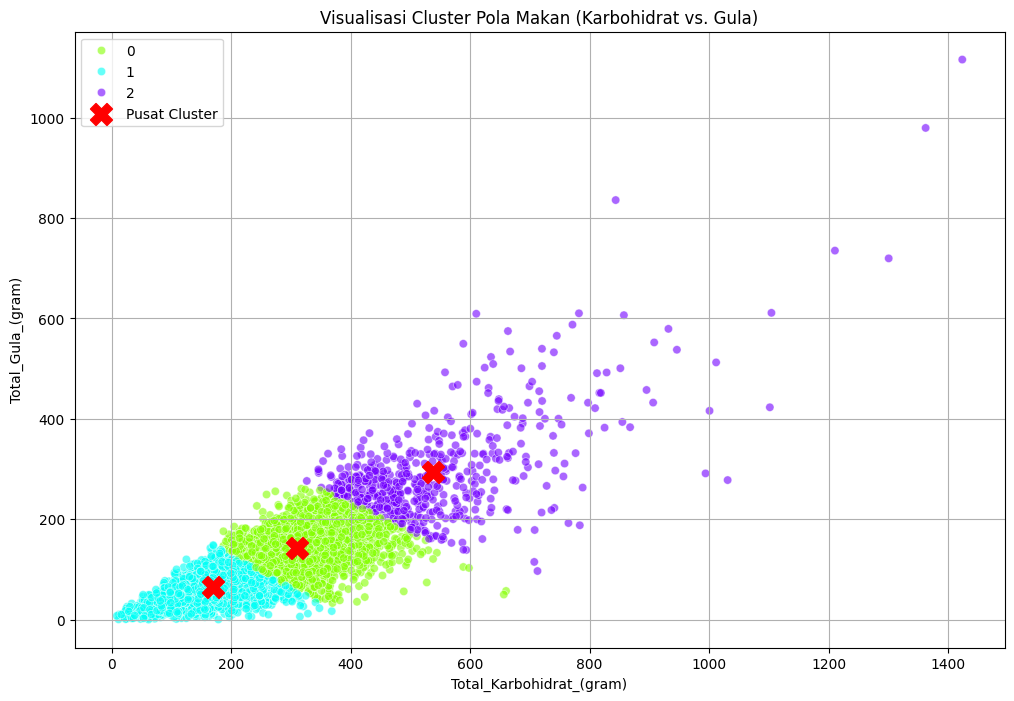

In [22]:
# 6.2. Visualisasi Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Total_Karbohidrat_(gram)',
    y='Total_Gula_(gram)',
    hue='Pola_Diet_Cluster',
    palette=sns.color_palette("hsv", n_colors=optimal_k),
    data=analysis_df,
    legend="full",
    alpha=0.6
)
# Tambahkan titik pusat cluster (centroid) ke plot
plt.scatter(
    centroid_df['Total_Karbohidrat_(gram)'],
    centroid_df['Total_Gula_(gram)'],
    s=250,
    c='red',
    marker='X',
    label='Pusat Cluster'
)
plt.title('Visualisasi Cluster Pola Makan (Karbohidrat vs. Gula)')
plt.legend()
plt.grid(True)
plt.show()

#**7. Visualiasai PCA**

In [23]:
# 7.1. Analisis rata-rata IMT untuk setiap cluster
bmi_by_cluster = analysis_df.groupby('Pola_Diet_Cluster')['Indeks_Massa_Tubuh'].mean().reset_index()

/tmp/ipython-input-757449811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


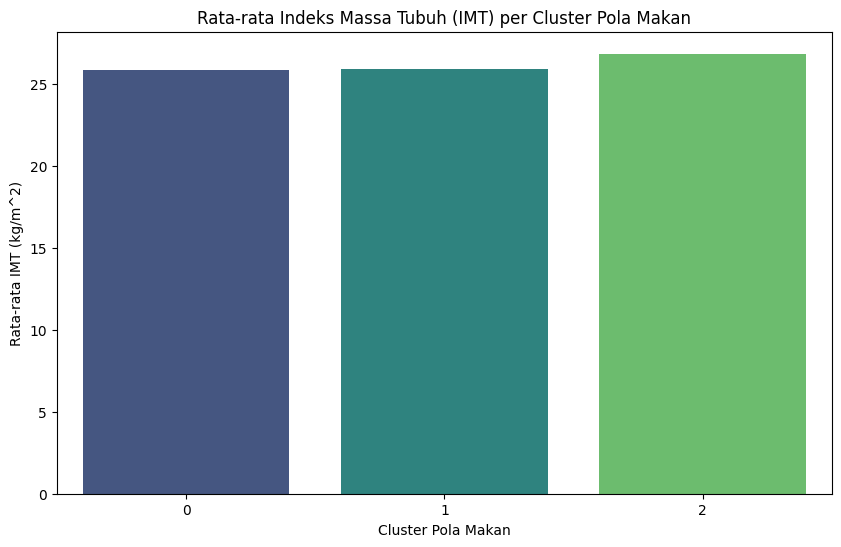

In [24]:
# 7.2. Visualisasi dengan Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Pola_Diet_Cluster',
    y='Indeks_Massa_Tubuh',
    data=bmi_by_cluster,
    palette='viridis'
)
plt.title('Rata-rata Indeks Massa Tubuh (IMT) per Cluster Pola Makan')
plt.ylabel('Rata-rata IMT (kg/m^2)')
plt.xlabel('Cluster Pola Makan')
plt.show()